In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

In [ ]:
train_data_path= '/content/drive/MyDrive/horse-or-human/train'
validation_data_path= '/content/drive/MyDrive/horse-or-human/validation'

In [ ]:
training_datagen= ImageDataGenerator(rescale=1./255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')


In [ ]:
training_data= training_datagen.flow_from_directory(train_data_path,
                                     target_size=(150,150),
                                     batch_size=32,
                                     class_mode='binary')

Found 1027 images belonging to 2 classes.


In [ ]:
training_data.class_indices

{'horses': 0, 'humans': 1}

In [ ]:
valid_datagen= ImageDataGenerator(rescale=1./255)

In [ ]:
Valid_data= valid_datagen.flow_from_directory(validation_data_path,
                                     target_size=(150,150),
                                     batch_size=32,
                                     class_mode='binary')

Found 256 images belonging to 2 classes.


In [ ]:
def plotImages(images_arr):
    fig, axes= plt.subplots(1, 5, figsize=(20, 20))
    axes= axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()  

In [ ]:
import matplotlib.pyplot as plt



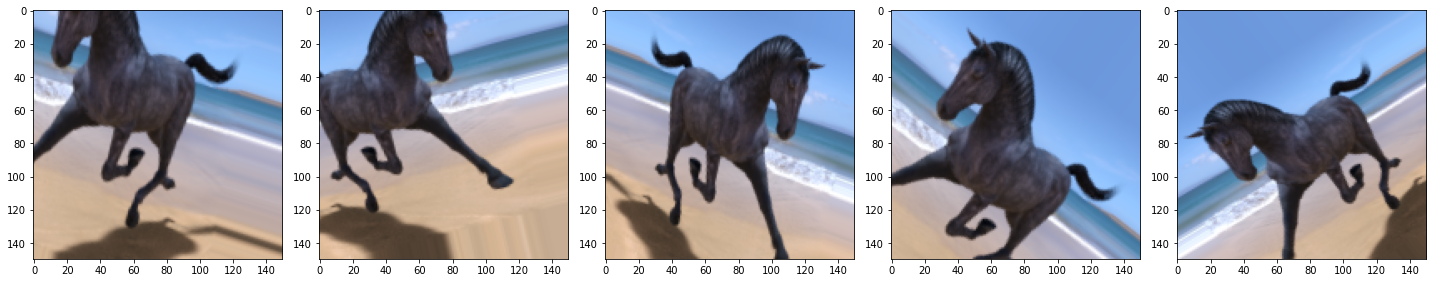

In [ ]:
images= [training_data[0][0][0] for i in range(5)]
plotImages(images) 

building cnn model

In [ ]:
cnn_model= keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),
                                    keras.layers.Flatten(),
                                    keras.layers.Dense(units=128, activation='relu'),
                                    keras.layers.Dropout(0.1),
                                    keras.layers.Dense(units=256, activation='relu'),
                                    keras.layers.Dropout(0.25),
                                    keras.layers.Dense(units=2, activation='softmax'),

])

Compile the cnn model


In [ ]:
cnn_model.compile(optimizer= Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model_path=r'C:\Users\acer\Desktop\Advance project data sciencehorse_or_human_predictor.h5'
checkpoint= ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list= [checkpoint]

In [ ]:
#train cnn Model

In [ ]:
history= cnn_model.fit(training_data,
                       epochs=100,
                       verbose=1,
                       validation_data= Valid_data,
                       callbacks=callbacks_list)

Epoch 1/100
33/33 [==============================] - ETA: 0s - loss: 0.6833 - accuracy: 0.5531
Epoch 1: val_accuracy improved from -inf to 0.50391, saving model to C:\Users\acer\Desktop\Advance project data sciencehorse_or_human_predictor.h5
33/33 [==============================] - 384s 12s/step - loss: 0.6833 - accuracy: 0.5531 - val_loss: 0.6859 - val_accuracy: 0.5039
Epoch 2/100
33/33 [==============================] - ETA: 0s - loss: 0.6317 - accuracy: 0.6504
Epoch 2: val_accuracy improved from 0.50391 to 0.55469, saving model to C:\Users\acer\Desktop\Advance project data sciencehorse_or_human_predictor.h5
33/33 [==============================] - 14s 425ms/step - loss: 0.6317 - accuracy: 0.6504 - val_loss: 0.7245 - val_accuracy: 0.5547
Epoch 3/100
33/33 [==============================] - ETA: 0s - loss: 0.5747 - accuracy: 0.7167
Epoch 3: val_accuracy did not improve from 0.55469
33/33 [==============================] - 14s 431ms/step - loss: 0.5747 - accuracy: 0.7167 - val_loss: 0.

In [ ]:
#summarize history for accuracy

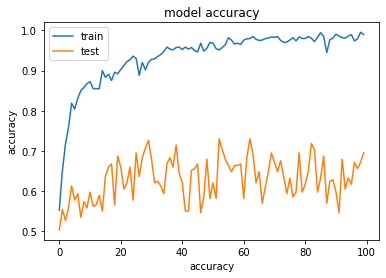

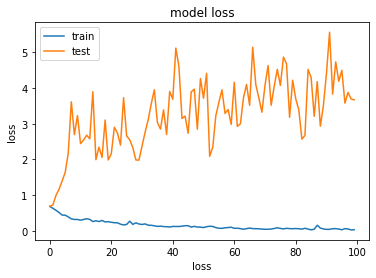

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
cnn_model.save_weights('My_model.h5')
cnn_model.load_weights('My_model.h5')

In [ ]:
path = '/content/drive/MyDrive/Outdoors-man-portrait_(cropped).jpg'

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# loads the image and resizes
def pred_human_horse(path, horse_or_human):
  test_image = image.load_img(horse_or_human, target_size=(150, 150))
  test_image = image.img_to_array(test_image)/255
  test_image = np.expand_dims(test_image, axis = 0)

  result = cnn_model.predict(test_image).round(3)

  pred =np.argmax(result)
  print(result, '---->>', pred)

  if pred == 0:
    print('predicted>>>>Horse')
  else:
    print('predicted>>>>Human')  



In [ ]:
for horse_or_human in [path]:
  pred_human_horse(cnn_model, horse_or_human)

1/1 [==============================] - 0s 19ms/step
[[0. 1.]] ---->> 1
predicted>>>>Human
